## <center>Multiple Linear Regression Assignment1</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Build a Multiple Linear Regression model for preparing a prediction model for predicting Price of the car with just the following column features
Corolla< Corolla[("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] </code>

In [1]:
#!pip install ml_metrics

In [2]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from ml_metrics import rmse
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the respective csv file and executing it
toyota_data = pd.read_csv('ToyotaCorolla.csv', encoding= 'unicode_escape')
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
#Reading the names of the columns of the toyota dataset
#since given that only few coulmns to be used for model building
toyota_data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
#Considering the given columns only
toyota = toyota_data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


#### Making necessary EDA for the model

In [6]:
#Inorder to avoid spacing columns are renamed
toyota1 = toyota.rename({'Age_08_04':'Age','Quarterly_Tax':'QtrTax'},axis=1)
toyota1.head()

,Price,Age,KM,HP,cc,Doors,Gears,QtrTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
#Checking for null values in the data
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QtrTax  1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
#checking if any duplicate values are present
toyota1[toyota1.duplicated(keep= False)]

,Price,Age,KM,HP,cc,Doors,Gears,QtrTax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
#Dropping the duplictae values  and checking the shape of the dataset
toyota2 = toyota1.drop_duplicates()
toyota2.shape

(1435, 9)

In [10]:
#checking the correlation of the dataset
toyota2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QtrTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QtrTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


>From the above correaltion table we can depict that there is no much collinearity between the independent datas

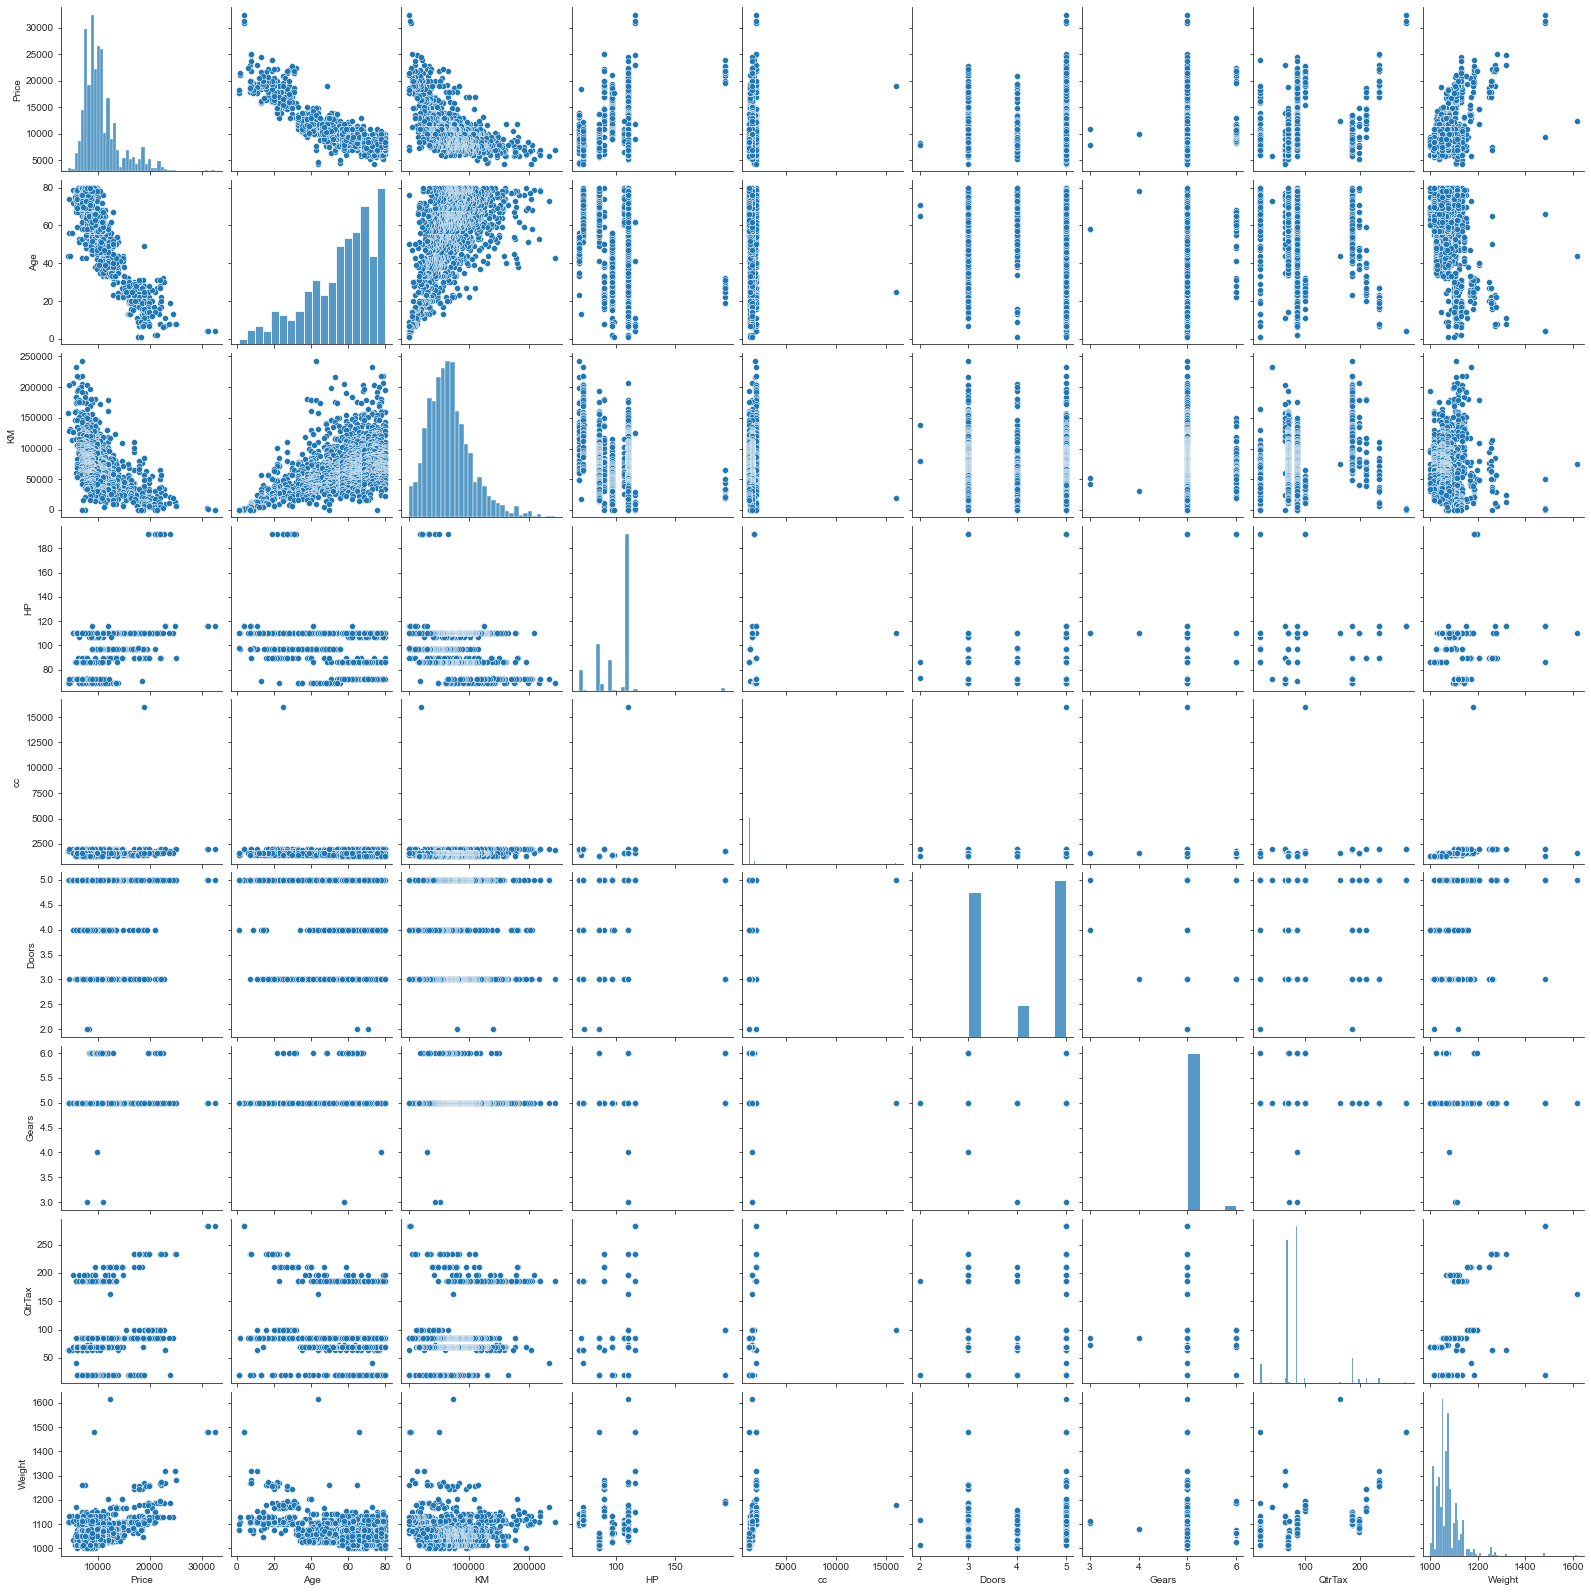

In [11]:
sns.set_style(style='ticks')
sns.pairplot(toyota2)

#### Model 1

In [12]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QtrTax+Weight', data = toyota2).fit()

In [13]:
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QtrTax          3.858805
Weight         16.855470
dtype: float64

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:21:58   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QtrTax         3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Predicting the model
pred1 = model1.predict(toyota2.iloc[:,1:])
root1=rmse(pred1,toyota2.Price)
root1

1337.590250731075

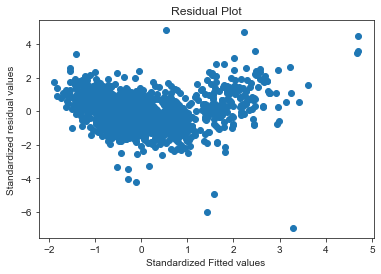

In [16]:
#Residual plot
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [17]:
toyota3= toyota2.drop(toyota2.index[[109,110,111,124,146,170,190,191,220,392,401,522,600,653,959,1057]],axis=0).reset_index()

In [18]:
toyota3= toyota3.drop(['index'],axis=1)

#### Model2

In [19]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QtrTax+Weight', data = toyota3).fit()

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1325.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:21:59   Log-Likelihood:                -12042.
No. Observations:                1419   AIC:                         2.410e+04
Df Residuals:                    1410   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.281e+04   1458.915     -8.779      0.000   -1.57e+04   -9946.344
Age         -114.9859      2.417    -47.568      0.000    -119.728    -110.244
KM            -0.0200      0.001    -17.773      0.000      -0.022      -0.018
HP            20.8295      2.586      8.054      0.000      15.756      25.903
cc            -0.1586      0.080     -1.981      0.048      -0.316      -0.002
Doors        -73.5254     36.164     -2.033      0.042    -144.467      -2.584
Gears        649.4229    172.976      3.754      0.000     310.105     988.741
QtrTax        -4.2058      1.298     -3.240      0.001      -6.752      -1.659
Weight        25.0748      1.268     19.773      0.000      22.587      27.562
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.526
Skew:                           0.082   Prob(JB):                       0.0383
Kurtosis:                       3.289   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
pred2 = model2.predict(toyota3.iloc[:,1:])
root2=rmse(pred2,toyota3.Price)
root2

1173.4030469746838

In [22]:
Table=pd.DataFrame({"Model":pd.Series(['Model1','Model2']),
                   "rsquared":(model1.rsquared,model2.rsquared),
                   "AIC":(model1.aic,model2.aic),
                   "rmse":(root1,root2)
                  })

In [23]:
Table

,Model,rsquared,AIC,rmse
0,Model1,0.862520,24750.407207,1337.590251
1,Model2,0.882568,24102.976267,1173.403047


#### Insights Drawn:
>from the table above it is clear that model2 provides the better rsquare value and the lower RMSE value.Hence model2 predicts better 